# TReNDS Neuroimaging Kaggle Competition

This particular challenge can be found [here](https://www.kaggle.com/c/trends-assessment-prediction). It is my first attempt with Neuroimaging data. 

## Table of contents
* [Competition Description](#Competition-Description)
* [Data Exploration/Understanding](#Data-Exploration/Understanding)
* [Data Cleaning](#Data-Cleaning)
* [EDA](#EDA)
* [Feature Importance](#Feature-Importance)
* [Feature Selection](#Feature-Selection)
* [Data Preparation](#Data-Preparation)
* [Machine Learning](#Machine-Learning)
* [Discussions](#Discussions)
* [Resources](#Resources)

## Competition Description

Human brain research is among the most complex areas of study for scientists. We know that age and other factors can affect its function and structure, but more research is needed into what specifically occurs within the brain. With much of the research using MRI scans, data scientists are well positioned to support future insights. In particular, neuroimaging specialists look for measurable markers of behavior, health, or disorder to help identify relevant brain regions and their contribution to typical or symptomatic effects.

In this competition, **multiple assessments** and **age** have to be predicted from multimodal brain MRI features. The contestants will be working from existing results of other data scientists.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
%matplotlib inline 

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trends-assessment-prediction/train_scores.csv
/kaggle/input/trends-assessment-prediction/ICN_numbers.csv
/kaggle/input/trends-assessment-prediction/loading.csv
/kaggle/input/trends-assessment-prediction/fnc.csv
/kaggle/input/trends-assessment-prediction/sample_submission.csv
/kaggle/input/trends-assessment-prediction/fMRI_mask.nii
/kaggle/input/trends-assessment-prediction/reveal_ID_site2.csv
/kaggle/input/trends-assessment-prediction/fMRI_test/20844.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/11923.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/10313.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/17689.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/15193.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/13944.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/19003.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/16488.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/13120.mat
/kaggle/input/trends-as

/kaggle/input/trends-assessment-prediction/fMRI_test/19031.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/18946.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/18906.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/10540.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/18653.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/16905.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/19997.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/20784.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/11098.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/10609.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/12531.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/19780.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/10754.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/12301.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/12430.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/11

/kaggle/input/trends-assessment-prediction/fMRI_test/17983.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/16779.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/21342.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/20801.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/12967.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/11363.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/10546.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/15297.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/17468.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/19884.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/14566.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/13421.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/20122.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/16655.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/19359.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/16

/kaggle/input/trends-assessment-prediction/fMRI_test/20659.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/10600.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/12317.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/20514.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/16893.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/19482.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/12028.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/12303.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/15467.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/10293.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/12597.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/17085.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/10101.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/13178.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/14855.mat
/kaggle/input/trends-assessment-prediction/fMRI_test/21

/kaggle/input/trends-assessment-prediction/fMRI_train/12857.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/19777.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/15746.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/14533.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/10019.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/12082.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/14807.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/16688.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/20143.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/18612.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/21379.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/15445.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/12294.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/16157.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/21080.mat
/kaggle/input/trends-assessment-predicti

/kaggle/input/trends-assessment-prediction/fMRI_train/13633.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/16162.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/10032.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/16158.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/14163.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/18774.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/11897.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/19357.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/18209.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/17911.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/19049.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/13349.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/20199.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/14430.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/14303.mat
/kaggle/input/trends-assessment-predicti

/kaggle/input/trends-assessment-prediction/fMRI_train/10329.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/17685.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/21356.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/18791.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/10345.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/18185.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/14699.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/17012.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/11463.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/12397.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/20036.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/17285.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/14687.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/13026.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/13236.mat
/kaggle/input/trends-assessment-predicti

/kaggle/input/trends-assessment-prediction/fMRI_train/18298.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/18512.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/12438.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/10497.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/10458.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/13969.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/20265.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/13407.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/21056.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/14194.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/19964.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/13563.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/20490.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/12777.mat
/kaggle/input/trends-assessment-prediction/fMRI_train/12324.mat
/kaggle/input/trends-assessment-predicti

## Data Exploration/Understanding

In [2]:
# loading data

# dependant values for train samples
train = pd.read_csv('/kaggle/input/trends-assessment-prediction/train_scores.csv').sort_values(by='Id')
# independant values for both train and test samples;  structural MRI data
loadings = pd.read_csv('/kaggle/input/trends-assessment-prediction/loading.csv')
#static FNC correlation features for both train and test samples
fnc = pd.read_csv('/kaggle/input/trends-assessment-prediction/fnc.csv')
#a sample submission file in the correct format
sample = pd.read_csv('/kaggle/input/trends-assessment-prediction/sample_submission.csv')
# a list of subject IDs whose data was collected with a different scanner than the train samples
reveal = pd.read_csv('/kaggle/input/trends-assessment-prediction/reveal_ID_site2.csv')
# intrinsic connectivity network numbers for each fMRI spatial map; matches FNC names
ICN = pd.read_csv('/kaggle/input/trends-assessment-prediction/ICN_numbers.csv')


The data loaded above has been obtained as a results of applying the **group information guided ICA (GIG-ICA) technique** on the train fMRI data.

**Independent Component Analysis (ICA)** is a statistical method used to discover hidden factors (sources or features) from a set of measurements or observed data such that the sources are maximally independent. The ICA decomposition of the fMRI data resultes in a set of brain maps, and corresponding timecourses. 


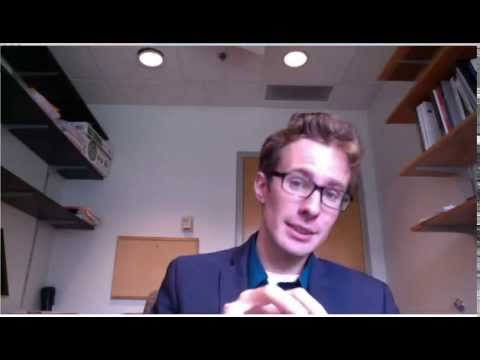

In [3]:
from IPython.display import IFrame, YouTubeVideo
YouTubeVideo('C0nDropNuiI',width=600, height=400)

Below you can find a more in-depth explanation for ICA.

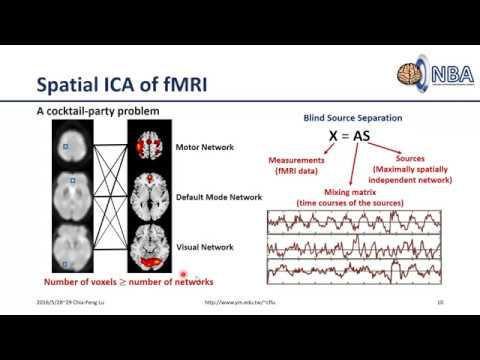

In [4]:
from IPython.display import IFrame, YouTubeVideo
YouTubeVideo('n95tOxWcQkw',width=600, height=400)

**Train** dataset containts the dependant values for the train sample. 
The dependant variables *domain1_var1*, *domain1_var2*, *domain2_var1*,*domain2_var2* have been used to anonymize the age data in order to help protect subject identity and minimize the risk of unethical usage of the data.

In [5]:
train.head()

Id        age  domain1_var1  domain1_var2  domain2_var1  domain2_var2
0  10001  57.436077     30.571975     62.553736     53.325130     51.427998
1  10002  59.580851     50.969456     67.470628     60.651856     58.311361
2  10004  71.413018     53.152498     58.012103     52.418389     62.536641
3  10005  66.532630           NaN           NaN     52.108977     69.993075
4  10007  38.617381     49.197021     65.674285     40.151376     34.096421

In [6]:
train.shape

(5877, 6)

**Loadings** dataset contains the subject-level weights from a group-level ICA decomposition of gray matter concentration maps from structural MRI (sMRI) scans. These are the independant variables for both train and test data.

These features represent parts of the brain and their explanations are listed below:

`
IC_01 - Cerebellum
IC_02 - ACC+mpfc
IC_03 - Caudate
IC_04 - Cerebellum
IC_05 - Calcarine
IC_06 - Calcarine
IC_07 - Precuneus+PCC
IC_08 - Frontal
IC_09 - IPL+AG
IC_10 - MTG
IC_11 - Frontal
IC_12 - SMA
IC_13 - Temporal Pole
IC_14 - Temporal Pole + Fusiform
IC_15 - STG
IC_16 - Middle Occipital?
IC_17 - Cerebellum
IC_18 - Cerebellum
IC_20 - MCC
IC_21 - Temporal Pole + Cerebellum
IC_22 - Insula + Caudate
IC_24 - IPL+Postcentral
IC_26 - Inf+Mid Frontal
IC_28 - Calcarine
IC_29 - MTG
IC_30 - Inf Frontal
`

In [7]:
loadings.head()

Id     IC_01     IC_07     IC_05     IC_16     IC_26     IC_06  \
0  10001  0.006070  0.014466  0.004136  0.000658 -0.002742  0.005033   
1  10002  0.009087  0.009291  0.007049 -0.002076 -0.002227  0.004605   
2  10003  0.008151  0.014684  0.010444 -0.005293 -0.002913  0.015042   
3  10004  0.004675  0.000957  0.006154 -0.000429 -0.001222  0.011755   
4  10005 -0.000398  0.006878  0.009051  0.000369  0.000336  0.010679   

      IC_10     IC_09     IC_18  ...     IC_08     IC_03     IC_21     IC_28  \
0  0.016720  0.003484  0.001797  ...  0.018246  0.023711  0.009177 -0.013929   
1  0.012277  0.002946  0.004086  ...  0.014635  0.022556  0.012004 -0.011814   
2  0.017745  0.003930 -0.008021  ...  0.019565  0.030616  0.018184 -0.010469   
3  0.013010  0.000193  0.008075  ...  0.002658  0.022266  0.005956 -0.010595   
4  0.010352  0.003637  0.004180  ...  0.009702  0.017257  0.005454 -0.008591   

      IC_11     IC_20     IC_30     IC_22     IC_29     IC_14  
0  0.030696  0.010496  0.002892 -0.023235  0.022177  0.017192  
1  0.022479  0.005739  0.002880 -0.016609  0.025543  0.014524  
2  0.029799  0.015435  0.005211 -0.028882  0.031427  0.018164  
3  0.024078 -0.000319  0.005866 -0.015182  0.024476  0.014760  
4  0.019416  0.000786  0.002692 -0.019814  0.017105  0.013316  

[5 rows x 27 columns]

In [8]:
loadings.shape

(11754, 27)

**Fnc** dataset contains correlation values, known as **Functional Network Connectivity (FNC)** that summarize the overall connection between independent brain maps over time. Therefore, the FNC features gives a picture of the connectivity pattern over time between independent networks (or brain maps). 

For our data, FNC features represent he subject-level cross-correlation values among 53 component timecourses estimated from GIG-ICA of resting state functional MRI (fMRI).

There are **1378** features in `fnc.csv` file without `Id`. Those features are named as `Network1(X)_vs_Network2(Y)` and there are **7** different networks. Network names and abbreviations are listed below:

`
SCN - Sub-cortical Network
ADN - Auditory Network
SMN - Sensorimotor Network
VSN - Visual Network
CON - Cognitive-control Network    
DMN - Default-mode Network
CBN - Cerebellar Network
`

In [9]:
fnc.head()

Id  SCN(53)_vs_SCN(69)  SCN(98)_vs_SCN(69)  SCN(99)_vs_SCN(69)  \
0  10001            0.368580            0.166876            0.438148   
1  10002            0.151696           -0.024819            0.217504   
2  10003            0.343415            0.109974            0.741641   
3  10004            0.132793            0.258255            0.490769   
4  10005            0.291921            0.251254            0.416470   

   SCN(45)_vs_SCN(69)  ADN(21)_vs_SCN(69)  ADN(56)_vs_SCN(69)  \
0            0.341007           -0.186251            0.049096   
1            0.418072           -0.227234           -0.064052   
2            0.578558           -0.676446           -0.436960   
3            0.342717            0.091112            0.107969   
4            0.511719           -0.362626           -0.164710   

   SMN(3)_vs_SCN(69)  SMN(9)_vs_SCN(69)  SMN(2)_vs_SCN(69)  ...  \
0           0.121417          -0.174268          -0.231578  ...   
1          -0.143832          -0.118116          -0.054825  ...   
2          -0.295663          -0.377790          -0.344963  ...   
3           0.029220          -0.026237           0.094742  ...   
4          -0.289059          -0.015537          -0.087316  ...   

   CBN(13)_vs_DMN(94)  CBN(18)_vs_DMN(94)  CBN(4)_vs_DMN(94)  \
0           -0.149279            0.552841           0.131046   
1           -0.214216           -0.039792           0.143014   
2           -0.154941            0.136850          -0.022361   
3           -0.130339            0.309540           0.141469   
4           -0.139525            0.394932           0.040443   

   CBN(7)_vs_DMN(94)  CBN(18)_vs_CBN(13)  CBN(4)_vs_CBN(13)  \
0           0.335446            0.394867          -0.042853   
1          -0.189962            0.498373           0.444231   
2           0.137625            0.677972           0.409412   
3           0.030853            0.344394           0.214097   
4           0.428334            0.498837           0.266755   

   CBN(7)_vs_CBN(13)  CBN(4)_vs_CBN(18)  CBN(7)_vs_CBN(18)  CBN(7)_vs_CBN(4)  
0           0.124627          -0.060712           0.515964          0.290488  
1           0.592438           0.028649           0.705524          0.248327  
2           0.563892           0.438684           0.618204          0.284474  
3           0.317556           0.012435           0.665937          0.081358  
4           0.227379           0.028984           0.752343          0.087898  

[5 rows x 1379 columns]

In [10]:
fnc.shape

(11754, 1379)

**Reveal** dataset is a list of subject IDs whose data was collected with a different scanner than the train samples.According to the organizers,eventhough all the data from the training set was collected from site 1, models are expected to generalize on data from this different scanner/site (site 2). 

This dataset can be used to inform the models about site effects. Site effects are a form of bias. To generalize well, models should learn features that are not related to or driven by site effects.

In [11]:
reveal.head()

Id
0  10012
1  10014
2  10020
3  10034
4  10059

**Component Spatial Maps** are 4-D tensors where where x , y , and z are the three spatial dimensions of the volume, and k is the number of independent components. The maps are derived using the ICA(independent component analysis) technique from resting state functional fMRI data.

For this competition,we have been provided with the component spatial maps of 53 spatial networks. These features are contained under the directories below:

* `fMRI_train` - a folder containing 53 3D spatial maps for train samples .mat format
* `fMRI_test` - a folder containing 53 3D spatial maps for test samples in .mat format


Each sample is a `.mat` file that contains 53 3D spatial maps. The `.mat` file can be read using the `h5py.` file.

To vizualize the maps, can use the `fMRI_mask.nii` - a 3D binary spatial map and a description of a generic brain topology. We can map the `.mat` file onto this generic brain topolgy. Thus, the nifti file `fMRI_mask.nii` is some kind of activation map that we use to map the `.mat` files.

Now we will take one `.mat` file from fMRI train data, load it and display its spatial maps on the nifti file(a structural MRI template) in one complete atlas using the nilearn plot_prob_atlas function. This digital probabilistic atlas of the human brain incorporates precise statistical information on positional variability of important functional and anatomic interfaces.



In [12]:
# trying loading the .mat files as proposed by organizers
# Download the ch2better template image for display
!wget https://github.com/Chaogan-Yan/DPABI/raw/master/Templates/ch2better.nii

--2020-07-05 07:25:14--  https://github.com/Chaogan-Yan/DPABI/raw/master/Templates/ch2better.nii
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Chaogan-Yan/DPABI/master/Templates/ch2better.nii [following]
--2020-07-05 07:25:15--  https://raw.githubusercontent.com/Chaogan-Yan/DPABI/master/Templates/ch2better.nii
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35193272 (34M) [application/octet-stream]
Saving to: ‘ch2better.nii’

ch2better.nii       100%[===================>]  33.56M  83.8MB/s    in 0.4s    

2020-07-05 07:25:16 (83.8 MB/s) - ‘ch2better.nii’ saved [35193272/35193272]



In [13]:
# loading necessary libraries
import numpy as np 
import nilearn as nl
from nilearn import plotting
import nilearn.plotting as nlplt    #library for neuro-imaging
import nibabel as nib    #used to read the nifti file (fMRI_mask.nii)
import h5py   #used to read .mat files. The file acts like a Python dictionary.
import matplotlib.pyplot as plt
from nilearn.plotting import view_img, glass_brain, plot_anat, plot_epi


In [14]:
# loading a subject's spatial map
mask_filename = '/kaggle/input/trends-assessment-prediction/fMRI_mask.nii'
subject_filename = '/kaggle/input/trends-assessment-prediction/fMRI_train/10015.mat'
smri_filename = 'ch2better.nii'
mask_niimg = nl.image.load_img(mask_filename)


In [15]:
# function for vizualization
def load_subject(filename, mask_niimg):
    subject_data = None
    with h5py.File(subject_filename, 'r') as f:
        subject_data = f['SM_feature'][()]
    # It's necessary to reorient the axes, since h5py flips axis order
    subject_data = np.moveaxis(subject_data, [0,1,2,3], [3,2,1,0])
    subject_niimg = nl.image.new_img_like(mask_niimg, subject_data, affine=mask_niimg.affine, copy_header=True)
    return subject_niimg

In [16]:
#use function on chosen .mat file
subject_niimg = load_subject(subject_filename, mask_niimg)
print("Image shape is %s" % (str(subject_niimg.shape)))
num_components = subject_niimg.shape[-1]
print("Detected {num_components} spatial maps".format(num_components=num_components))

Image shape is (53, 63, 52, 53)
Detected 53 spatial maps


So, the image has 53 spatial maps with dimensions 53x52 voxels and 63 number of slices.

/opt/conda/lib/python3.7/site-packages/nilearn/plotting/displays.py:99: UserWarning: linewidths is ignored by contourf
  **kwargs)
/opt/conda/lib/python3.7/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


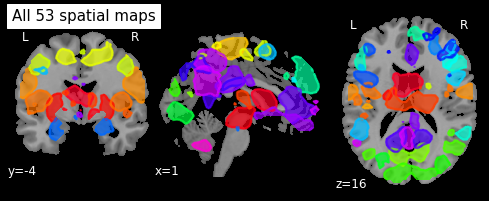

In [17]:
# displaying a subject's spatial map
nlplt.plot_prob_atlas(subject_niimg, bg_img=smri_filename, view_type='filled_contours', 
                      draw_cross=False, title='All %d spatial maps' % num_components, threshold='auto')

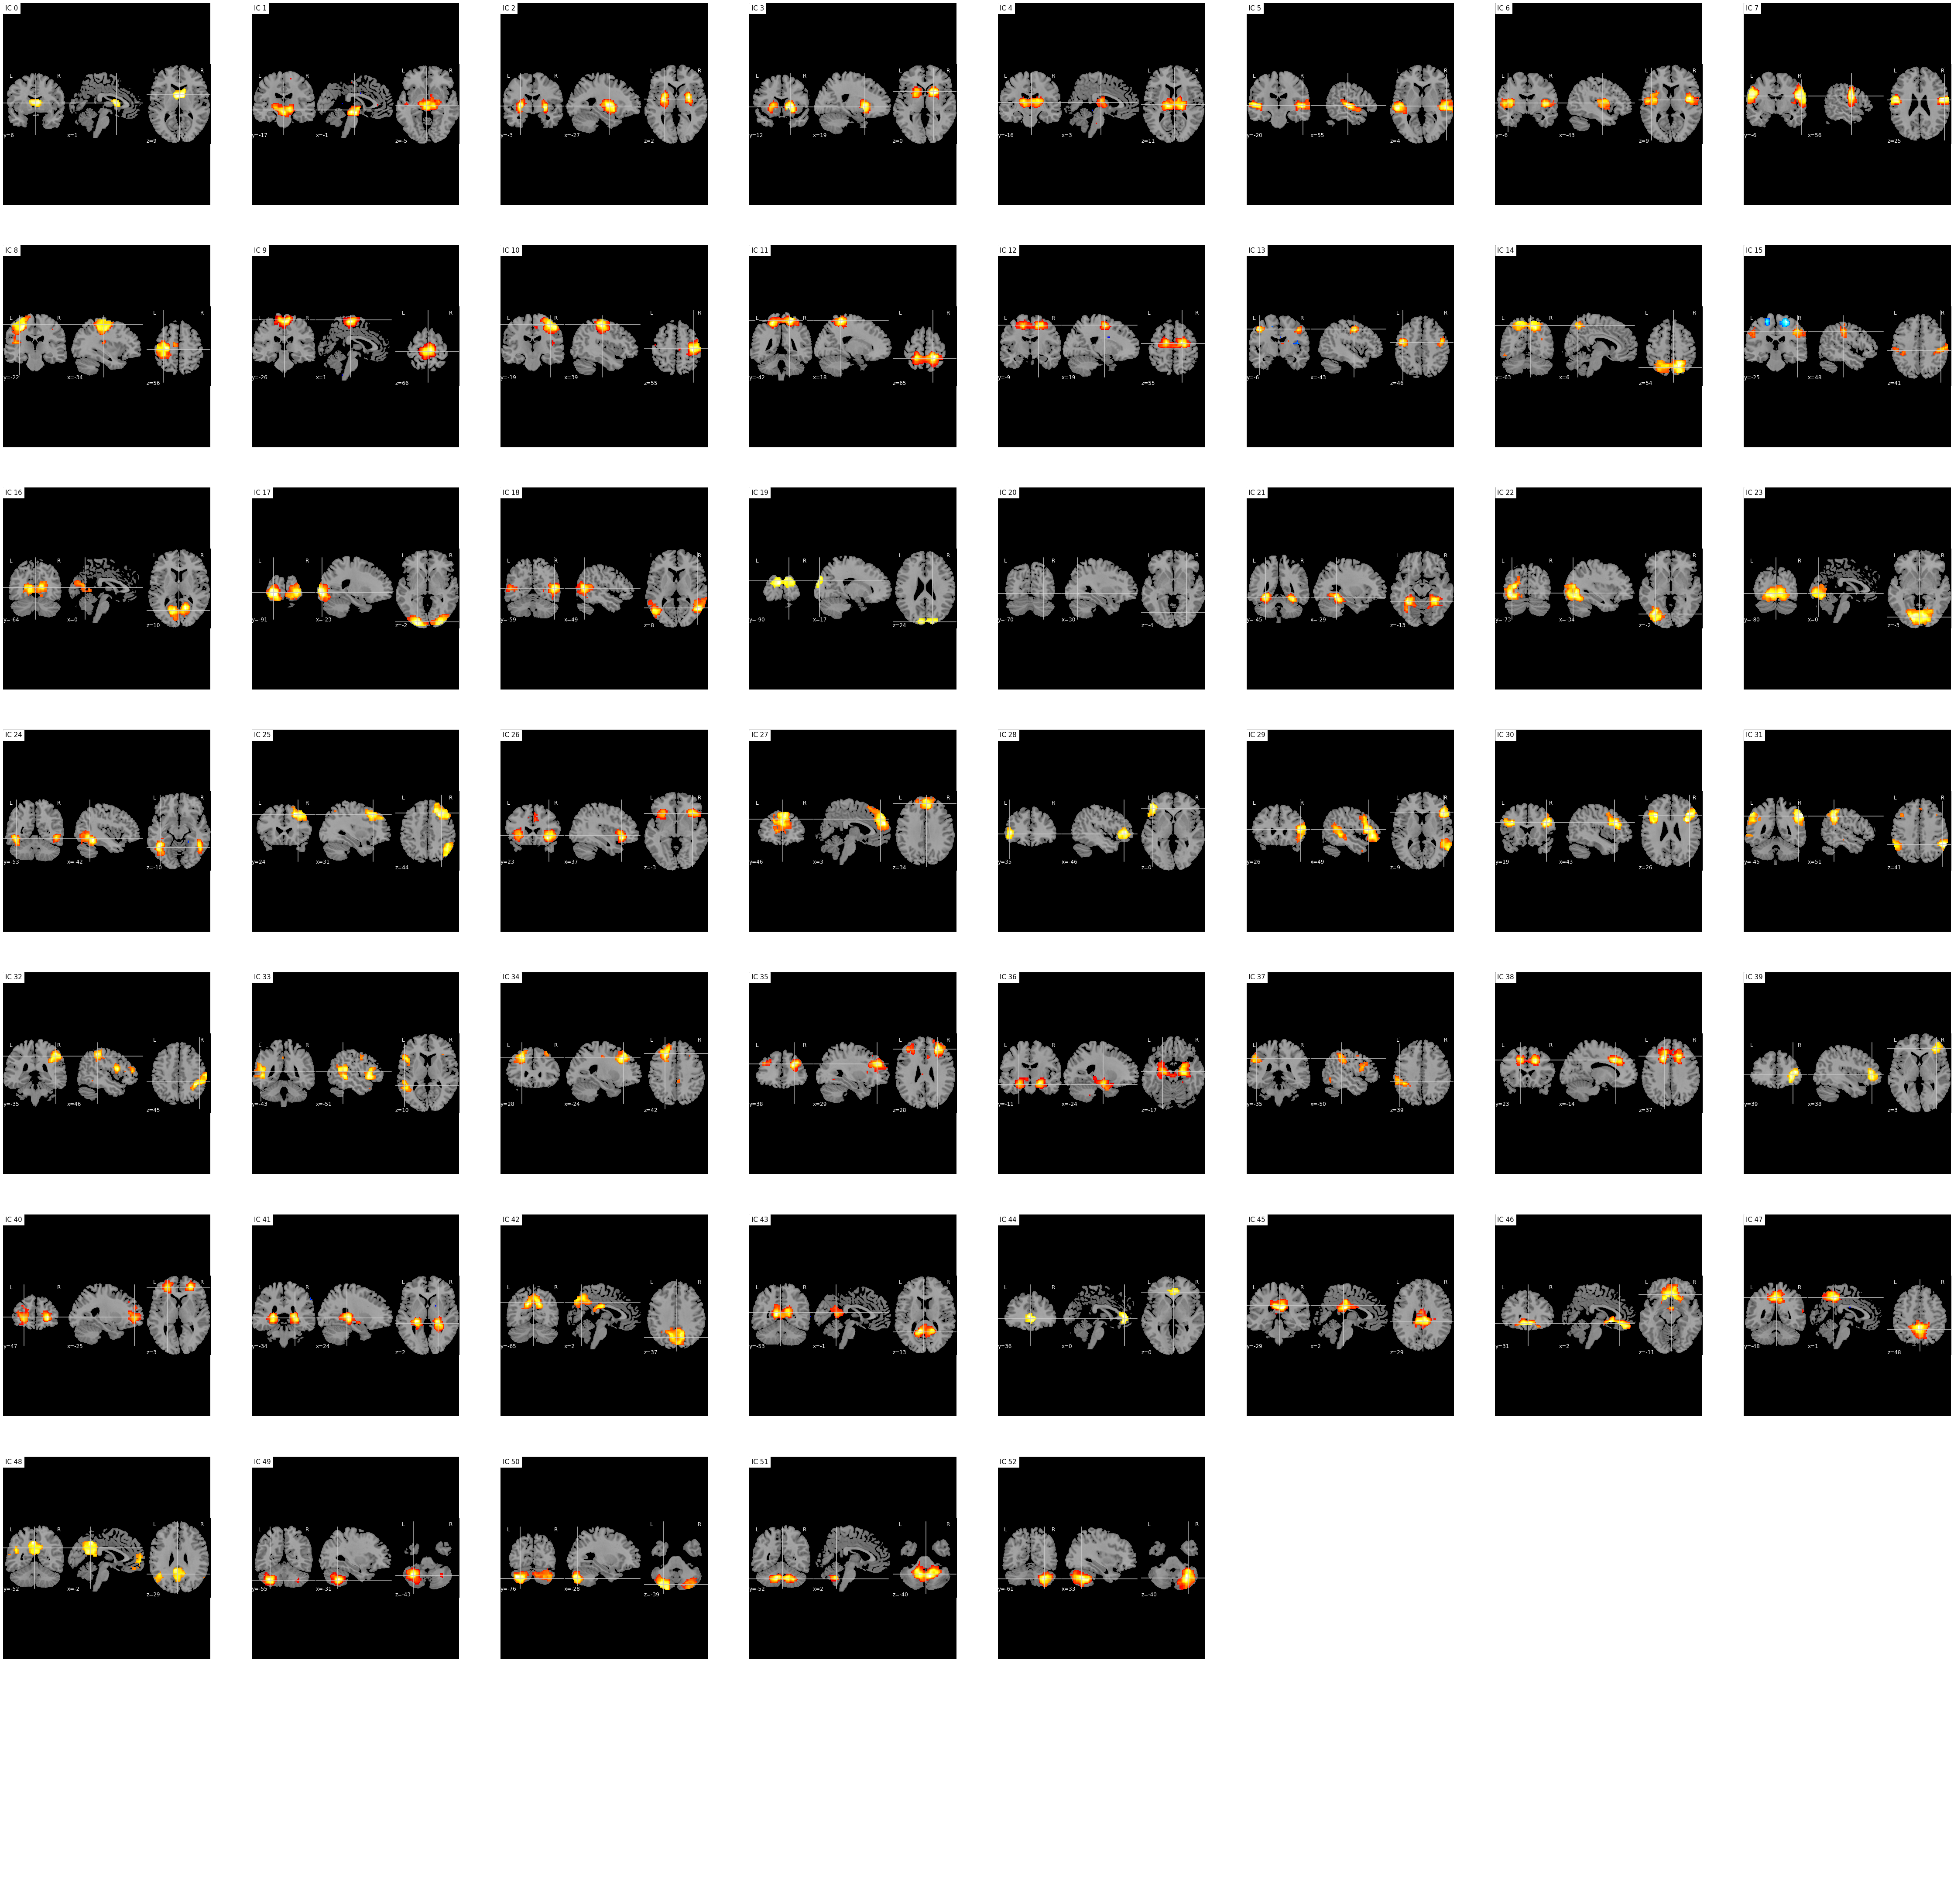

In [18]:
# displaying the individual component maps(independent variables) of this subject
grid_size = int(np.ceil(np.sqrt(num_components)))
fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size*10, grid_size*10))
[axi.set_axis_off() for axi in axes.ravel()]
row = -1
for i, cur_img in enumerate(nl.image.iter_img(subject_niimg)):
    col = i % grid_size
    if col == 0:
        row += 1
    nlplt.plot_stat_map(cur_img, bg_img=smri_filename, title="IC %d" % i, axes=axes[row, col], threshold=3, colorbar=False)

As mentioned before, the ICA decomposition of the fMRI data resultes in a set of brain maps, and corresponding timecourses. We have already vizualize the brain map, now let's explore the temporal data by looking at the timecourse of a random voxel.

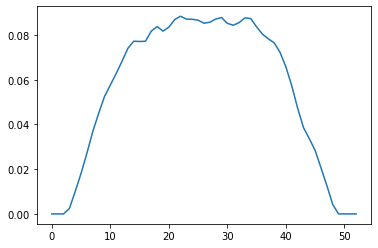

In [19]:
# plotting the average voxel signal intensity
subject_data= h5py.File('/kaggle/input/trends-assessment-prediction/fMRI_train/10015.mat','r')
subject_data=subject_data['SM_feature']
plt.plot(np.mean(subject_data,axis=(0,1,2)))

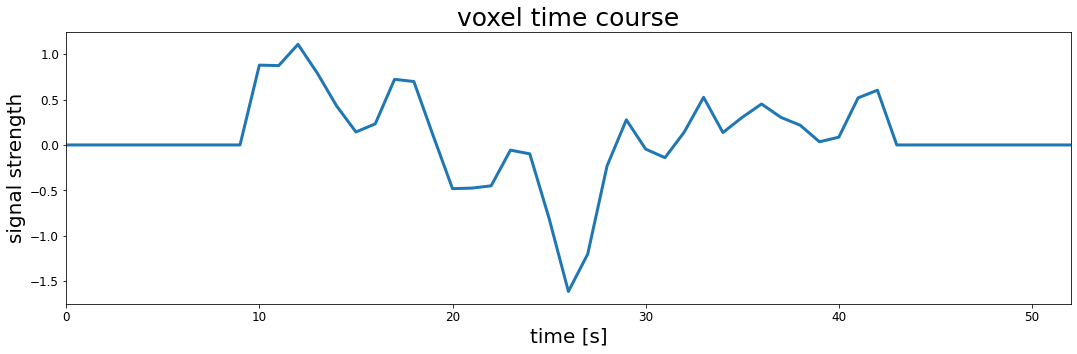

In [20]:
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

# plotting the timecourse of a random voxel(volumetric pixel) 
ax.plot(subject_data[10, 10, 15, :], lw=3)
ax.set_xlim([0, subject_data.shape[3]-1])
ax.set_xlabel('time [s]', fontsize=20)
ax.set_ylabel('signal strength', fontsize=20)
ax.set_title('voxel time course', fontsize=25)
ax.tick_params(labelsize=12)

plt.show()

## Data Cleaning

In [21]:
# checking missing values
def missing_data(frame):
    total = frame.isnull().sum().sort_values(ascending=False)
    percent = (frame.isnull().sum()/frame.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
missing_data(train)

Total   Percent
domain1_var2    438  7.452782
domain1_var1    438  7.452782
domain2_var2     39  0.663604
domain2_var1     39  0.663604
age               0  0.000000
Id                0  0.000000

In [22]:
missing_data(loadings).head()

Total  Percent
IC_14      0      0.0
IC_24      0      0.0
IC_01      0      0.0
IC_07      0      0.0
IC_05      0      0.0

In [23]:
#handling missing values
train=train.fillna(train.mean())
train.head()

Id        age  domain1_var1  domain1_var2  domain2_var1  domain2_var2
0  10001  57.436077     30.571975     62.553736     53.325130     51.427998
1  10002  59.580851     50.969456     67.470628     60.651856     58.311361
2  10004  71.413018     53.152498     58.012103     52.418389     62.536641
3  10005  66.532630     51.474692     59.244132     52.108977     69.993075
4  10007  38.617381     49.197021     65.674285     40.151376     34.096421

## EDA

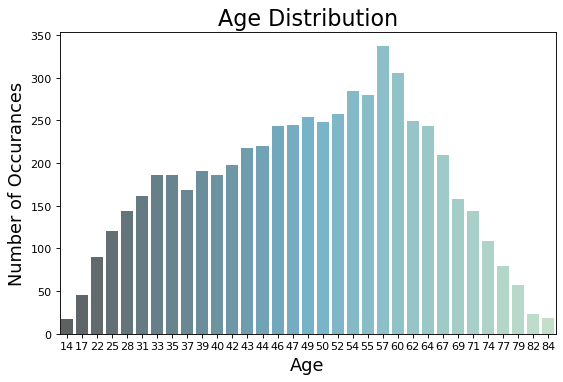

In [24]:
# plotting the distribution of age variable
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi= 80)
viz=sns.barplot(np.round(train['age'].value_counts().index).astype(int), train['age'].value_counts().values, alpha=0.8, palette="GnBu_d")
viz.set_title('Age Distribution', fontsize = 20)
viz.set_ylabel("Number of Occurances",fontsize=16)
viz.set_xlabel("Age",fontsize=16)
plt.show()

**Observation:**  Top 5 most frequent ages are 57, 60, 54, 55, 52. Most of the subjects lie between the age group 22 to 77.

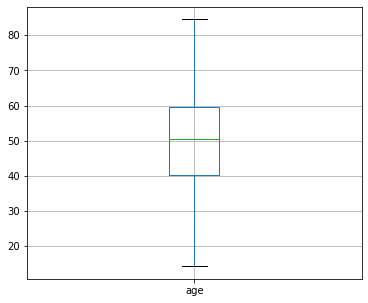

In [25]:
# vizualizing a boxplot to understand outliers
train.boxplot('age', showfliers=False,figsize=(6,5))
plt.show()

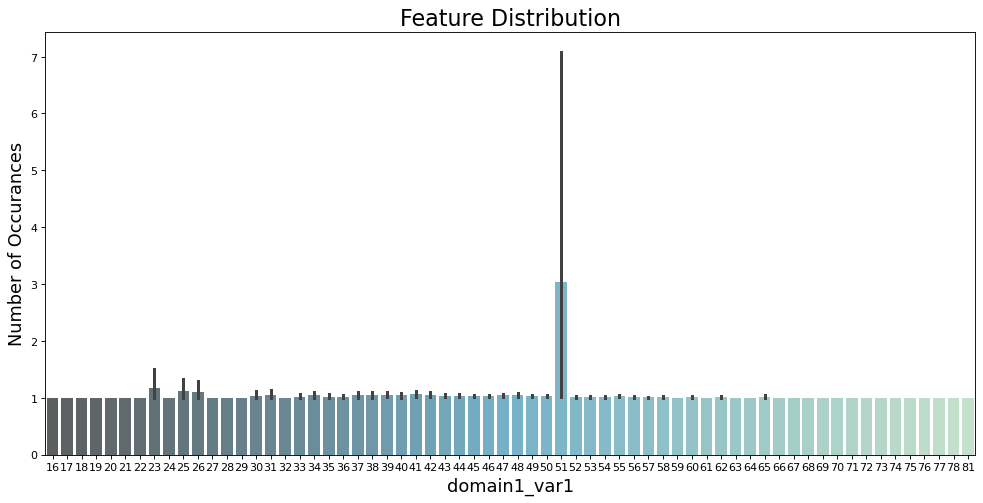

In [26]:
# plotting the distribution of domain1_var1 variable
# same plotting can be done with the rest
plt.figure(figsize=(15,7), dpi= 80)
viz=sns.barplot(np.round(train['domain1_var1'].value_counts().index).astype(int), train['domain1_var1'].value_counts().values, alpha=0.8, palette="GnBu_d")
viz.set_title('Feature Distribution', fontsize = 20)
viz.set_ylabel("Number of Occurances",fontsize=16)
viz.set_xlabel("domain1_var1",fontsize=16)
plt.show()

 **Observation:**  The variable has 65 unique values when rounded to nearest integers, 51 is the most frequent.

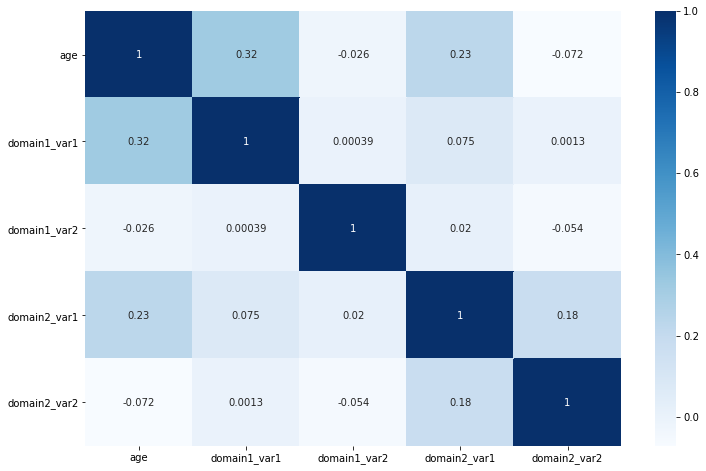

In [27]:
# plotting a heatmap to observe the correlation between train dataset features
train_data =  train.drop(['Id'], axis=1)

plt.figure(figsize = (12, 8))
sns.heatmap(train_data.corr(), annot = True, cmap="Blues")
plt.yticks(rotation=0) 

plt.show()


**Observation:** *Age* and *domain1_var1* have a correlation value of **0.34**, which is quite significant and shows a positive correlation between these two variables. This is explained by the fact that domain1 variables have been derived from age data.

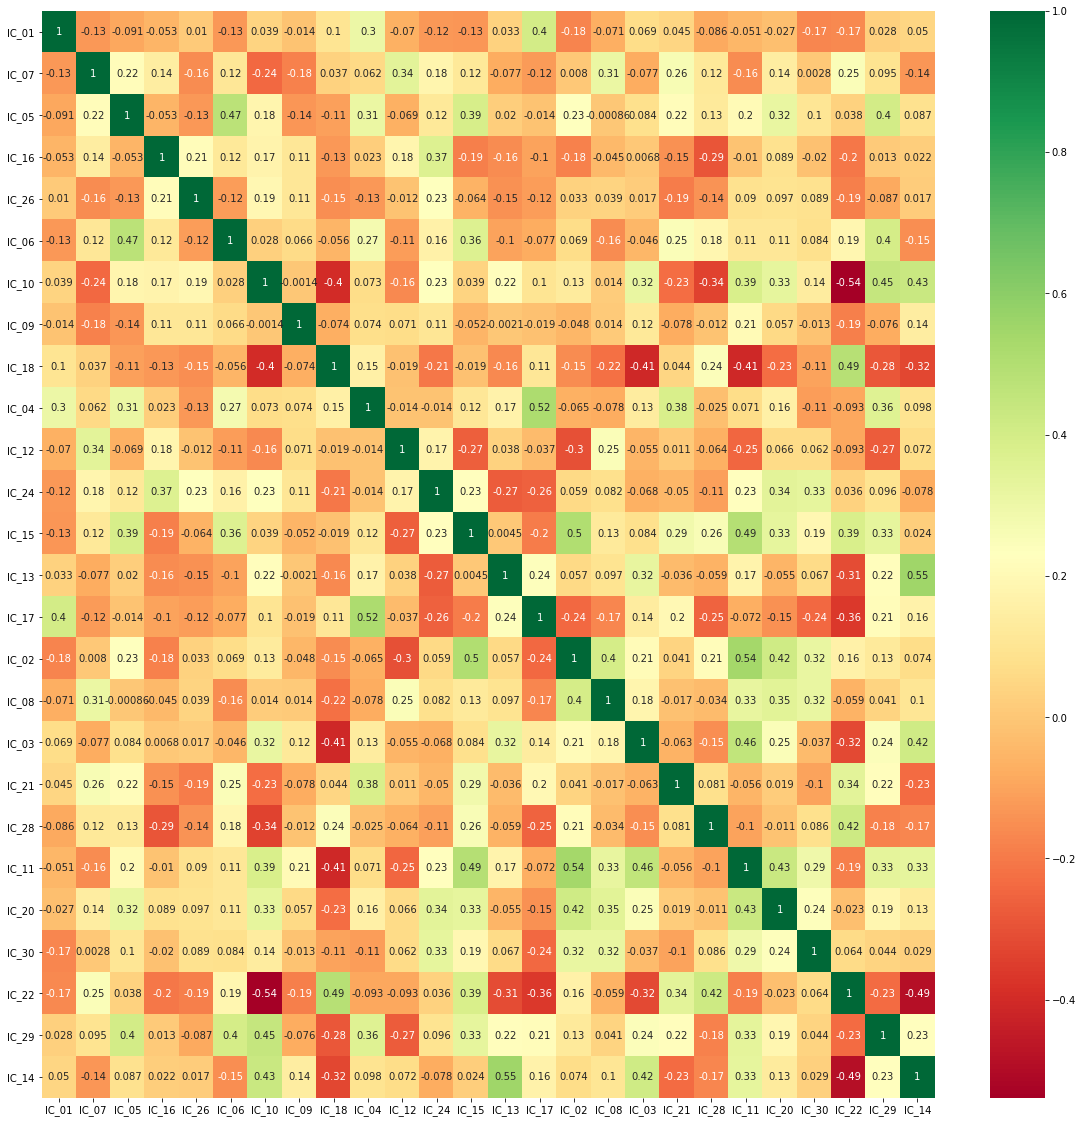

In [28]:
# plotting a heatmap to observe the correlation between loadings dataset features
loadings_data =  loadings.drop(['Id'], axis=1)

plt.figure(figsize = (20, 20))
sns.heatmap(loadings_data.corr(), annot = True, cmap="RdYlGn")
plt.yticks(rotation=0) 

plt.show()

**Observation:** Loading features have decent correlations between themselves that exceed 0.5 and -0.5. Some of those high positive correlations belong to feature groups which are from the same part of the brain. However, all features from the same part of the brain are not necessarily correlated with each other, so there is no pattern here.

Below we will determine which are the most highly correlated features.

In [29]:
# finding the most correlated features

# create a correlation matrix
correl = loadings_data.corr().abs()

# select upper triangle of correlation matrix
upper = correl.where(np.triu(np.ones(correl.shape), k=1).astype(np.bool))
# find index of feature columns with correlation greater than 0.5
high_corr = [column for column in upper.columns if any(upper[column] > 0.5)]

print('Very high correlated features: ', high_corr)

Very high correlated features:  ['IC_17', 'IC_02', 'IC_11', 'IC_22', 'IC_14']


When features are highly or perfectly correlated, this means that they contain highly similar information and there is very little or no variance in information. 

We do not do anything with these highly correlated features as, most probably, they will be filtered out by the algorithm if we will use Random Forests or Gradient Boosting techniques, or will be dropped out during the feature selection step.

## Feature Importance

A feature importance analysis followed by a feature selection has the potential of increasing the model’s performance. While some models like XGBoost do feature selection for us, it is still important to be able to know the impact of a certain feature on the model’s performance because it gives you more control over the task you are trying to accomplish. 

Below we will try to calculate features' importances, however with such high dimensional data we cannot do it in traditional ways. Therefore, we will use the **LOFO approach**(Leave One Feature Out), which enables us to group the features and get one importance value for a whole group.

We will consider each loading feature as separate feature, and fnc features as one group. We will then calculate the feature importances for each target using a ridge regression model with cross-validation.

In [30]:
!pip install lofo-importance

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [31]:
# prepare data
df = fnc.merge(loadings, on="Id")
train["is_train"] = True
df = df.merge(train, on="Id", how="left")
test_df = df[df["is_train"] != True].copy()
df = df[df["is_train"] == True].copy()

In [32]:
#import necessary libraries
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from lofo import LOFOImportance, Dataset, plot_importance

#transform columns into lists
fnc_features, loading_features = list(fnc.columns[1:]), list(loadings.columns[1:])


#function for determining importance
def get_lofo_importance(target):
    cv = KFold(n_splits=5, shuffle=True, random_state=0)

    dataset = Dataset(df=df[df[target].notnull()], target=target, 
                      features=loading_features, 
                      feature_groups={"fnc": df[df[target].notnull()][fnc_features].values/500})

    model = Ridge(0.01)
    lofo_imp = LOFOImportance(dataset, cv=cv, scoring="neg_mean_absolute_error", model=model)

    return lofo_imp.get_importance()

/opt/conda/lib/python3.7/site-packages/lofo/lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


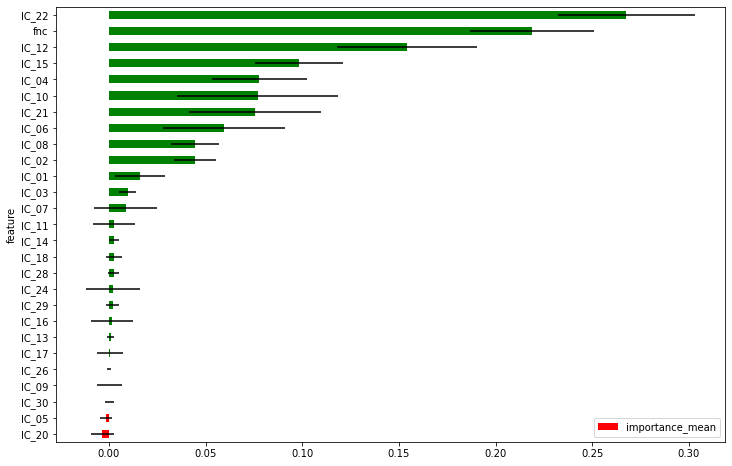

In [33]:
#plot feature importance for age variable
plot_importance(get_lofo_importance(target="age"), figsize=(12, 8))

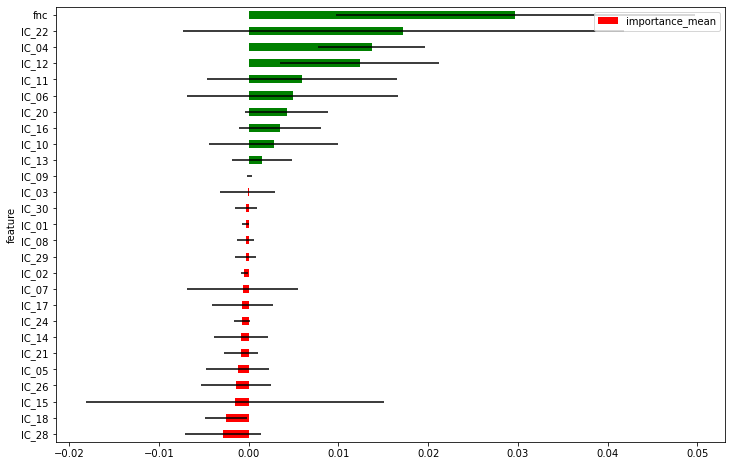

In [34]:
#plot feature importance for domain1_var1 variable
plot_importance(get_lofo_importance(target="domain1_var1"), figsize=(12, 8))

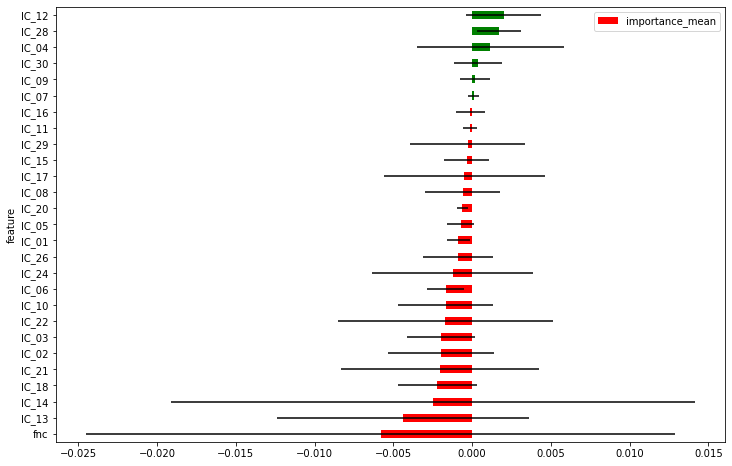

In [35]:
#plot feature importance for domain1_var2 variable
plot_importance(get_lofo_importance(target="domain1_var2"), figsize=(12, 8))

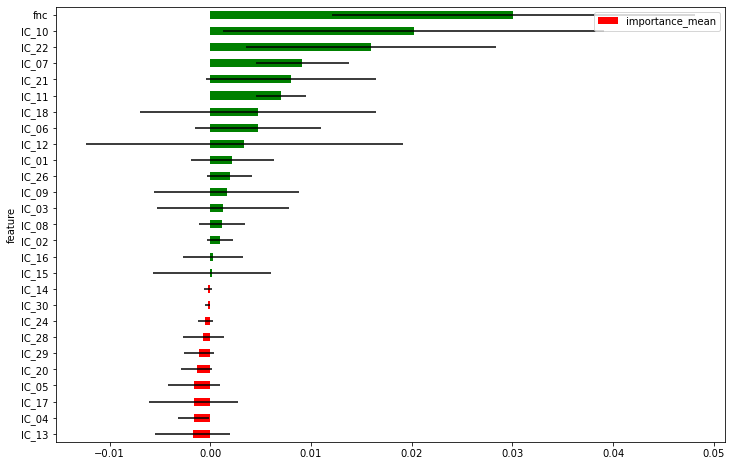

In [36]:
#plot feature importance for domain2_var1 variable
plot_importance(get_lofo_importance(target="domain2_var1"), figsize=(12, 8))

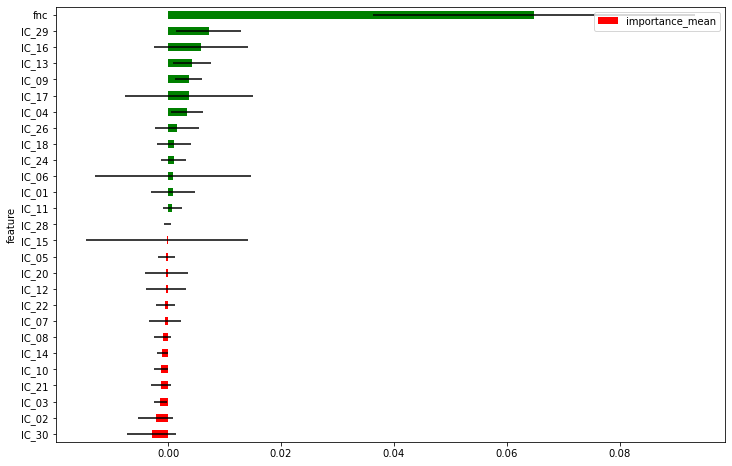

In [37]:
#plot feature importance for domain2_var2 variable
plot_importance(get_lofo_importance(target="domain2_var2"), figsize=(12, 8))

## Feature Selection

Now let's *select* the relevant features for our model. This will most likely improve the score of the model as well as its performance since we might reduce the number of input variables. 

**Benefits of performing feature selection before modeling:**
* reduce Overfitting: Less redundant data means less opportunity to make decisions based on noise.
* improves Accuracy: Less misleading data means modeling accuracy improves.
* reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.



In [38]:
# defining the weights given to each feature by the organizers
loss_wt = [.3, .175, .175, .175, .175]  

The evaluation metric for this competition is the **feature-weighted, normalized absolute error**. The weights have been given by the organizers and have been stored in the cell above in the `loss_wt` list. 

We will now define a function for the evaluation metric. This will be used in the feature selection process to determine whether a feature should be considered for training when building the model or not.



In [39]:
#defining the fuction for the metric
def metric(weight,y_pred,y_true):   
    s = np.sum(np.abs(y_pred-y_true))/np.sum(y_true)
    return weight*s

From our **LOFO** analysis and the nice vizualizations above, we were able to see that the fnc features have a high importance for all the variables except **domain1_var2**. Thus, we will need to use these features when training the model as they contain valuable information for the majority of our target variables.

In the code below we will try to run a feature selection algorithm on the loadings features only, using the **Greedy approach (Sequential Feature Selector library)**, in order to see which ones are important for which target variables but also to understand which loading features is not relevant for any of our target variables and thus, can be excluded. 

We will use the threashold of 1000 for the loss function defined above as a metric and the same ridge regression model.

In [40]:
#prepare data for this specific task, without fnc values
target_col = ['age', 'domain1_var1', 'domain1_var2', 'domain2_var1', 'domain2_var2']
train_dataset = train.merge(loadings, on='Id', how='left') 
X = train_dataset.drop(target_col,axis=1)
y=train.drop('Id', axis=1)
X=X.drop('Id', axis=1)
col=y.columns

In [41]:
#split data for validation purposes
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [42]:
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeRegressor


loss_dict ={} #To keep the history of loss
best_feat_col ={} #Dictionary to store best feature for each target variable
model = Ridge(0.01)

for i in range(5): #Iterate for every target feature
    print("Selecting best feature subset for " +str(col[i])+".....")
    min_loss=1000
    store =[]
    best_feature=[]
    #best_feature
    for x in range(1,27): ##Iterate for x best subset among 26 feature
        sfs = SFS(model,k_features=x,forward=True,floating=False,scoring = 'neg_mean_squared_error',
                  cv = 5) #For forward selection set forward to True
        sfs.fit(train_X,train_y.iloc[:,i])
        col_n = list((sfs.k_feature_names_))
        model.fit(train_X[col_n],train_y.iloc[:,i])
        loss = metric(loss_wt[i],val_y.iloc[:,i],model.predict(val_X[col_n]))
        if(loss<min_loss):
            min_loss=loss
            best_feature = col_n
        store.append(loss)
    best_feat_col[col[i]]= list(best_feature)
    loss_dict[col[i]]=store
            

Selecting best feature subset for age.....
Selecting best feature subset for domain1_var1.....
Selecting best feature subset for domain1_var2.....
Selecting best feature subset for domain2_var1.....
Selecting best feature subset for domain2_var2.....


In [43]:
#creating a list of all relevant features
best_features=best_feat_col['age']+best_feat_col['domain1_var1']+best_feat_col['domain1_var2']+best_feat_col['domain2_var1']+best_feat_col['domain2_var2']
#determining the length of this list
len(set(best_features))

27

In [44]:
columns=list(loadings.columns)
diff=list(set(columns)-set(best_features))
diff

['Id']

We can see that when using the threshold for the loss function as 1000 and a Ridge regression model, all loadings features can be important for our model. Thus, we will not exclude any. 

This analysis didn't bring us much but it was fun to run.

## Data Preparation

According to [this discussion](https://www.kaggle.com/c/trends-assessment-prediction/discussion/155299) scaling the FNC values could help us prevent overfitting and, as a result, obtain better scores for our models. Given the large number of fnc features, we will scale them by 1/500 in order to give them lower priority.

In [45]:
fnc_features, loading_features = list(fnc.columns[1:]), list(loadings.columns[1:])


In [46]:
#scaling the fnc features for both training and test datasets
fnc_scale = 1/500

df[fnc_features] *= fnc_scale
test_df[fnc_features] *= fnc_scale

In [47]:
df.head()

Id  SCN(53)_vs_SCN(69)  SCN(98)_vs_SCN(69)  SCN(99)_vs_SCN(69)  \
0  10001            0.000737            0.000334            0.000876   
1  10002            0.000303           -0.000050            0.000435   
3  10004            0.000266            0.000517            0.000982   
4  10005            0.000584            0.000503            0.000833   
6  10007            0.000047            0.000504            0.001143   

   SCN(45)_vs_SCN(69)  ADN(21)_vs_SCN(69)  ADN(56)_vs_SCN(69)  \
0            0.000682           -0.000373            0.000098   
1            0.000836           -0.000454           -0.000128   
3            0.000685            0.000182            0.000216   
4            0.001023           -0.000725           -0.000329   
6            0.000677           -0.000209           -0.000399   

   SMN(3)_vs_SCN(69)  SMN(9)_vs_SCN(69)  SMN(2)_vs_SCN(69)  ...     IC_30  \
0           0.000243          -0.000349          -0.000463  ...  0.002892   
1          -0.000288          -0.000236          -0.000110  ...  0.002880   
3           0.000058          -0.000052           0.000189  ...  0.005866   
4          -0.000578          -0.000031          -0.000175  ...  0.002692   
6          -0.000482          -0.000382          -0.000057  ...  0.000733   

      IC_22     IC_29     IC_14        age  domain1_var1  domain1_var2  \
0 -0.023235  0.022177  0.017192  57.436077     30.571975     62.553736   
1 -0.016609  0.025543  0.014524  59.580851     50.969456     67.470628   
3 -0.015182  0.024476  0.014760  71.413018     53.152498     58.012103   
4 -0.019814  0.017105  0.013316  66.532630     51.474692     59.244132   
6 -0.008462  0.026733  0.014358  38.617381     49.197021     65.674285   

   domain2_var1  domain2_var2  is_train  
0     53.325130     51.427998      True  
1     60.651856     58.311361      True  
3     52.418389     62.536641      True  
4     52.108977     69.993075      True  
6     40.151376     34.096421      True  

[5 rows x 1411 columns]

In [48]:
test_df.head()

Id  SCN(53)_vs_SCN(69)  SCN(98)_vs_SCN(69)  SCN(99)_vs_SCN(69)  \
2   10003            0.000687            0.000220            0.001483   
5   10006            0.000647            0.000234            0.001281   
9   10010           -0.000453           -0.000087            0.000669   
10  10011            0.000335            0.000332            0.001042   
11  10012            0.001039            0.000594            0.001191   

    SCN(45)_vs_SCN(69)  ADN(21)_vs_SCN(69)  ADN(56)_vs_SCN(69)  \
2             0.001157           -0.001353           -0.000874   
5             0.000641           -0.000639           -0.000606   
9             0.000638           -0.000342           -0.000519   
10            0.000810           -0.000311           -0.000076   
11            0.001549           -0.001016           -0.000164   

    SMN(3)_vs_SCN(69)  SMN(9)_vs_SCN(69)  SMN(2)_vs_SCN(69)  ...     IC_30  \
2           -0.000591          -0.000756          -0.000690  ...  0.005211   
5           -0.000428          -0.000713          -0.000471  ...  0.005046   
9           -0.000279           0.000070           0.000181  ...  0.004841   
10          -0.000104           0.000104           0.000174  ...  0.000210   
11           0.000077           0.000038           0.000344  ...  0.003368   

       IC_22     IC_29     IC_14  age  domain1_var1  domain1_var2  \
2  -0.028882  0.031427  0.018164  NaN           NaN           NaN   
5  -0.030771  0.028500  0.022485  NaN           NaN           NaN   
9  -0.009467  0.027287  0.014542  NaN           NaN           NaN   
10 -0.013350  0.033612  0.019472  NaN           NaN           NaN   
11 -0.024025  0.024723  0.024084  NaN           NaN           NaN   

    domain2_var1  domain2_var2  is_train  
2            NaN           NaN       NaN  
5            NaN           NaN       NaN  
9            NaN           NaN       NaN  
10           NaN           NaN       NaN  
11           NaN           NaN       NaN  

[5 rows x 1411 columns]

In [49]:
#prepare a list of features
features = loading_features + fnc_features


In [50]:
#defining the metric for the machine learning step
def metric(y_true, y_pred):
    return np.mean(np.sum(np.abs(y_true - y_pred), axis=0)/np.sum(y_true, axis=0))

## Machine Learning

There are two approaches for model evaluation and estimation of a model's performance on out-of-sample data:

* splitting the training data into training and test sets using the **train_test_split** function
* using k-fold **cross validation** (training set is split into *k* smaller sets; the model is trained using *k-1* of the folds as training data and validated on the remaining part of the data)

**Advantages of cross-validation**:
* more accurate estimate of out-of-sample accuracy
* more "efficient" use of data

**Advantages of train_test_split**:
* less computationally computationally expensive 
* easier to examine the detailed results of the testing process


In this notebook I will use the cross-validation method.

In [51]:
# importing the necessary libraries
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


In [52]:
# creating a dictionary for algorithms
ESTIMATORS = {
    "Extra Trees": ExtraTreesRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting" : GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(), 
    "SVR": SVR (),
    "Light GBM": LGBMRegressor()
    
} 

In [53]:
#defining function for training and evaluating the algorithms
def evaluation(model):
    
    NUM_FOLDS = 5
    kf = KFold(n_splits=NUM_FOLDS, shuffle=True, random_state=0)
    overal_score = 0
    
    for target, c, w in [("age", 100, 0.3), ("domain1_var1", 10, 0.175), ("domain1_var2", 10, 0.175), ("domain2_var1", 10, 0.175), ("domain2_var2", 10, 0.175)]:    
        y_oof = np.zeros(df.shape[0])
        y_test = np.zeros((test_df.shape[0], NUM_FOLDS))
    
        for f, (train_ind, val_ind) in enumerate(kf.split(df, df)):
            train_df, val_df = df.iloc[train_ind], df.iloc[val_ind]
            train_df = train_df[train_df[target].notnull()]

            model=model
            model.fit(train_df[features], train_df[target])

            y_oof[val_ind] = model.predict(val_df[features])
            y_test[:, f] = model.predict(test_df[features])
        
        df["pred_{}".format(target)] = y_oof
        test_df[target] = y_test.mean(axis=1)
        score = metric(df[df[target].notnull()][target].values, df[df[target].notnull()]["pred_{}".format(target)].values)
        overal_score += w*score
        
        print(target, np.round(score, 4))
       
    
    print('Overall Score:', np.round(overal_score, 4))

In [54]:
'''# obtaining the score for each algorithm
overall_score=dict()
for name, estimator in ESTIMATORS.items(): 
    print('Estimator:', name)
    print()
    overall_score[name]=evaluation(estimator)
    print()
'''

"# obtaining the score for each algorithm\noverall_score=dict()\nfor name, estimator in ESTIMATORS.items(): \n    print('Estimator:', name)\n    print()\n    overall_score[name]=evaluation(estimator)\n    print()\n"

Running the cell above takes more than 9 hours which is the limit for running a Kaggle kernel. Thus, I will provide below the scores obtained with the code above:

* Extra Trees  **0.1628**
* Random Forest  **0.1633**
* Gradient Boosting:  **0.1607**
* XGBoost:  **0.1733**
* SVR:  **0.1594**
* Light GBM:  **0.1569**

The best overall score of **0.1569** has been obtained by using the **LightGBM Regressor**. Predicting the target variables with this algorithm led to a Public Score of **0.16348** on Kaggle for this particular competition.

However, performing a parameter tuning on the SVR model and predicting the target variables with the tuned model, gave the same overall score using the competition's evaluation metric,**but**, it led to a better public score of **0.16185**(783/1047) on Kaggle. Below, you can find the code for parameter tuning and the score(mean absolute value) for that particular model.

In [55]:
#performing a GridSearchCV on the SVR model
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits = 5, shuffle=True, random_state=29)
model=MultiOutputRegressor(SVR(), n_jobs=-1)
search_grid={ 'estimator__C':[0.8, 1, 2,5],'estimator__epsilon':[ 0.6,0.7,0.1], 
             'estimator__gamma':['scale', 'auto']}
search_1= GridSearchCV(model, search_grid, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error', verbose=4)
search_1.fit(X,y)
print(search_1.best_params_)
print(search_1.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  7.9min finished


{'estimator__C': 5, 'estimator__epsilon': 0.1, 'estimator__gamma': 'scale'}
-7.317608307567364


**Note**: Only some models support multivariate output (Random Forest, Decision Trees, ExtraTreesRegressor, Ridge Regression). For other regression models, like for Gradient Boosting, xgboost or SVR, the **MultiOutputRegressor** has to be used as a wrapper.

In [57]:
#using parameters obtained after the tuning to train and evaluate the new model
model=SVR(C=5, epsilon=0.1, gamma='scale')
evaluation(model)

age 0.1499
domain1_var1 0.1434
domain1_var2 0.1406
domain2_var1 0.1808
domain2_var2 0.1749
Overall Score: 0.1569


In [59]:
#making predictions
submission = pd.melt(test_df[["Id", "age", "domain1_var1", "domain1_var2", "domain2_var1", "domain2_var2"]], id_vars=["Id"], value_name="Predicted")
submission ["Id"] = submission ["Id"].astype("str") + "_" +  submission ["variable"].astype("str")
submission  = submission.drop("variable", axis=1).sort_values("Id")
submission.to_csv("submission.csv", index=False)

In [60]:
#preparing the submission file
submission.to_csv("submission.csv", index=False)

## Discussion

In this session I want to highlight the additional steps that could have been taken to improve the model:

* we could have used the `.mat` files for prediction, not just the tabular data
* we could have used site information from the reveal dataset to obtain more accurate predictions
* we could have performed feature engineering

## References

https://www.kaggle.com/gunesevitan/trends-neuroimaging-data-analysis-matlab-files
https://www.kaggle.com/saife245/neuroimaging-in-depth-understanding-eda-model
https://www.kaggle.com/nischaydnk/beginners-trends-neuroimaging-decent-score/input
https://www.kaggle.com/rohitsingh9990/trends-eda-visualization-simple-baseline 
https://www.kaggle.com/moradnejad/start-from-here-trends-eda-fe-submissions 
https://www.kaggle.com/soham1024/visualization-using-nilearn 
https://www.kaggle.com/anshumoudgil/brain-s-network-activation-via-graphs 
https://www.kaggle.com/aerdem4/trends-lofo-feature-importance 
https://www.kaggle.com/aryaprince/greedy-approch-toward-feature-selection 
https://www.kaggle.com/broach/trends-working-with-fmri-component-maps
https://www.kaggle.com/mks2192/reading-matlab-mat-files-and-eda
https://www.kaggle.com/c/trends-assessment-prediction/discussion